#### Goal:
This notebook works for processed Texas data. calculates the probability of getting the high generation cost from the high net load scenarios. We have in total 8 days, named as Jan20, Feb16, May27, Jun04, Jul09, Sep04, Nov20, Dec19. The goal is to predict high generation cost, load shedding from the scenario information. We did the same analysis as is done for RTS data.

In [1]:
import pandas as pd
import bz2
import matplotlib.pyplot as plt
import dill as pickle
import numpy as np
from numpy import mean
from PlotVaticScenarios import *

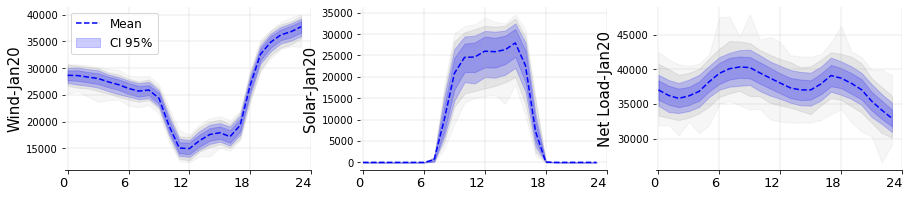

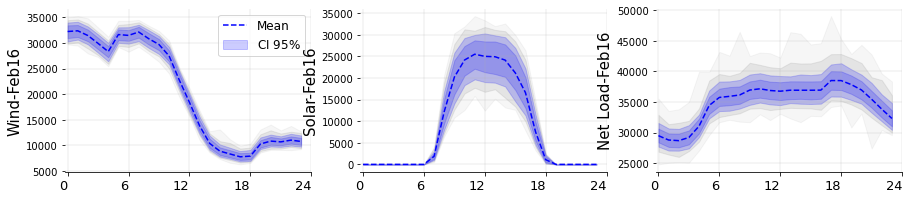

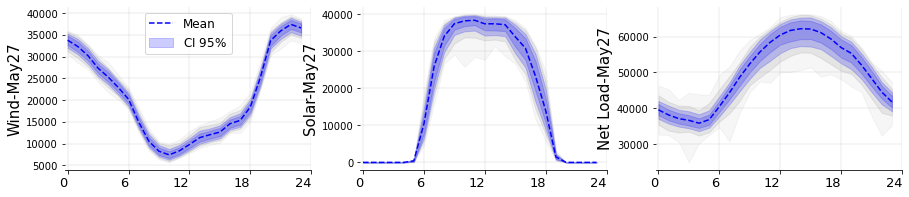

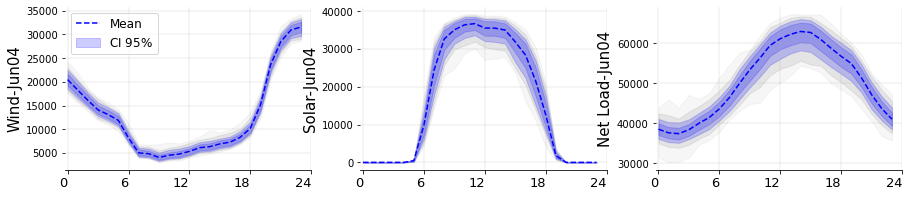

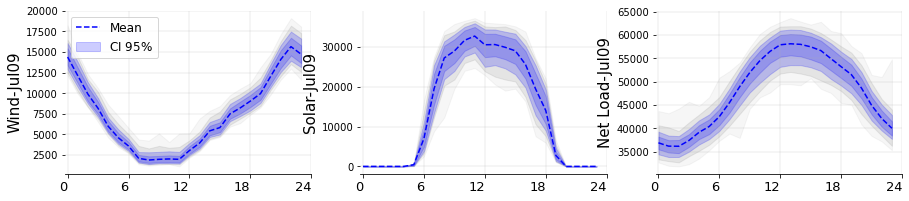

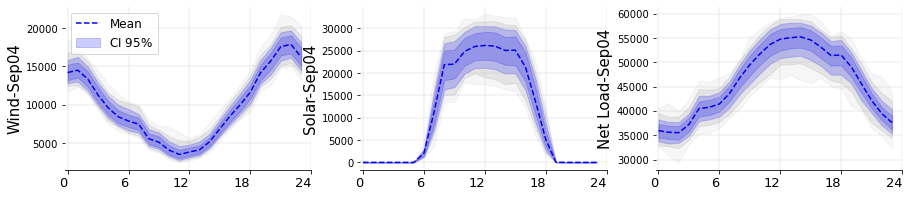

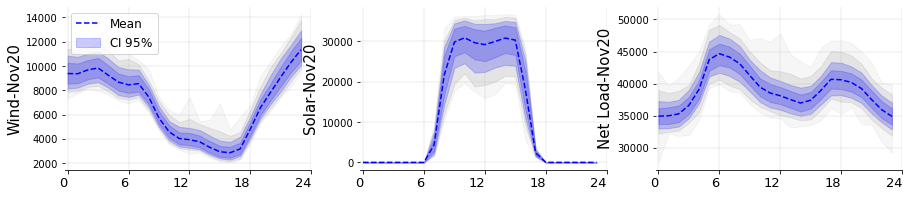

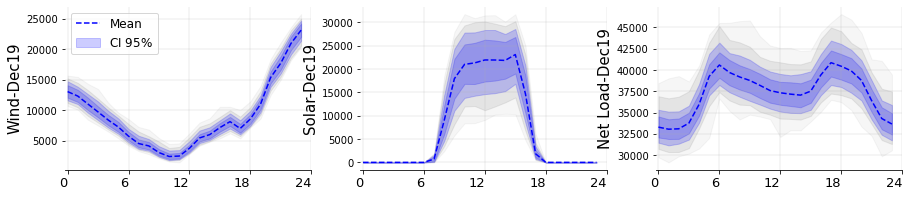

In [2]:
file_dir = "C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedDataTexas\\"
for date in ["Jan20","Feb16","May27","Jun04","Jul09","Sep04","Nov20","Dec19"]:
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    MeanScenario = pd.read_csv(file_dir+date+"\\Mean.csv")
    time= MeanScenario['time']
    PlotingScenarios(time, WindScenarios,SolarScenarios, LoadScenarios, date)


We have load shedding only for three days out of that eight days, namely Jan20, May 27 and Nov 20, that too for 1, 2, 10 scenarios respectively. Renewable curtailment is zero for all the eight days. The reserve short fall and generation cost are highly positively correlated, more than 90%.

correlation coefficient between generation cost and reserve short fall 0.9580922811008398
correlation coefficient between generation cost and reserve short fall 0.949252415645115
correlation coefficient between generation cost and reserve short fall 0.9396659471458216
correlation coefficient between generation cost and reserve short fall 0.8940447833353902
correlation coefficient between generation cost and reserve short fall 0.9192750253836449
correlation coefficient between generation cost and reserve short fall 0.899115537386466
correlation coefficient between generation cost and reserve short fall 0.9366465502640899
correlation coefficient between generation cost and reserve short fall 0.9528244404085104


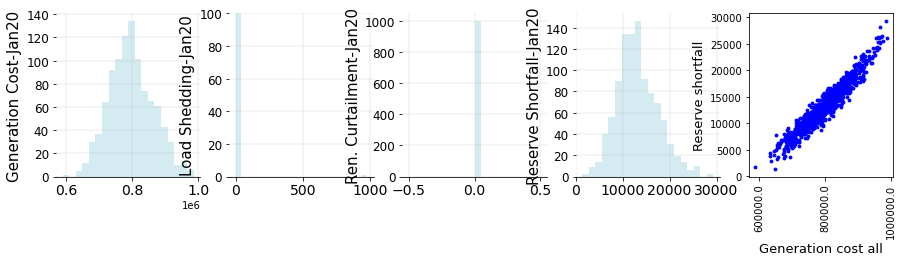

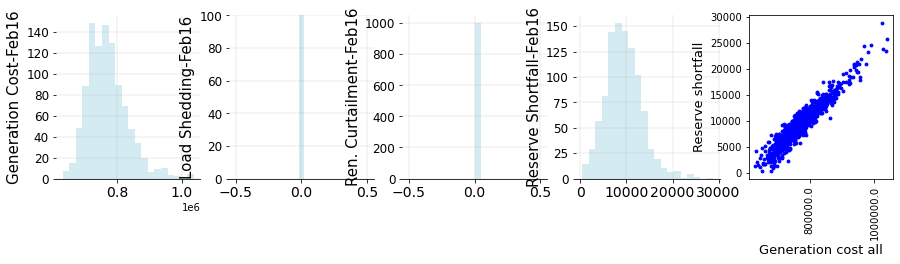

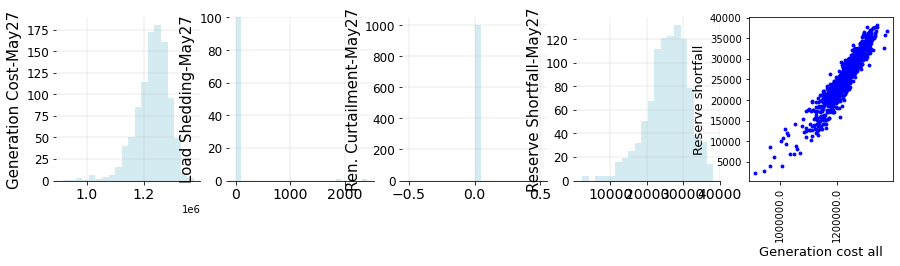

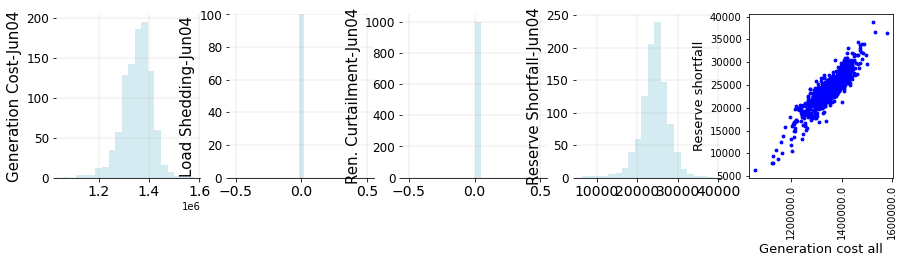

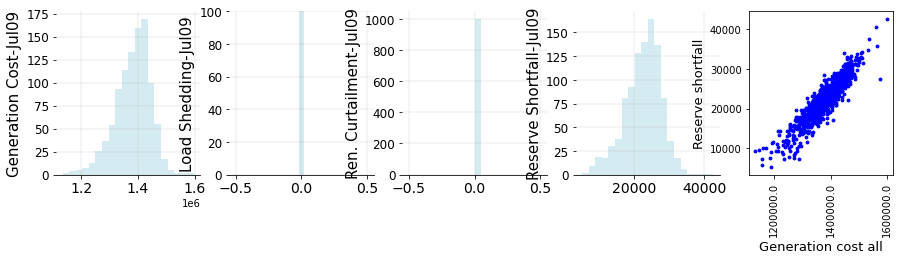

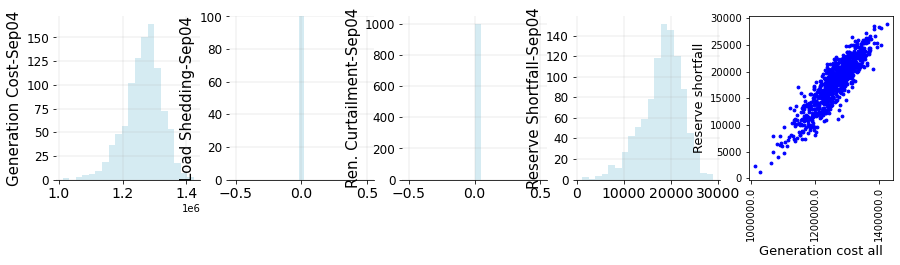

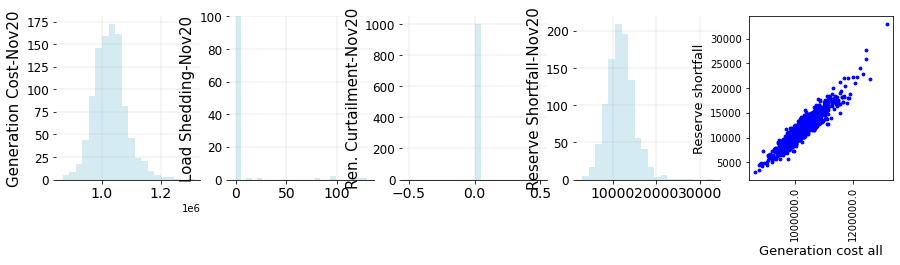

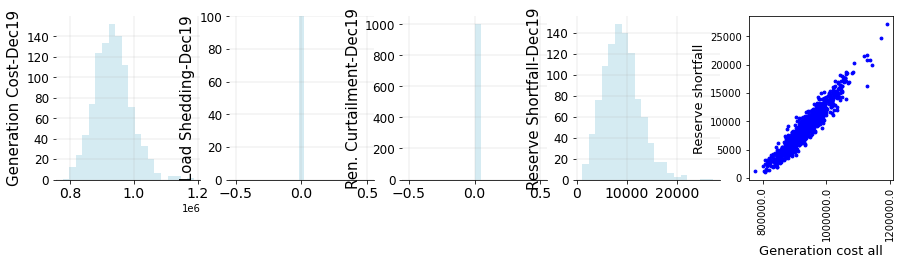

In [3]:
for date in ["Jan20","Feb16","May27","Jun04","Jul09","Sep04","Nov20","Dec19"]:
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    ReserveShortfallAll=VaticOutput['ReserveShortfallAll']
    PlotingVaticOutput(GenerationCostAll, LoadSheddingAll, RenewableCurtailmentAll, ReserveShortfallAll, date)

With more than 50-60% probability we can predict the high generation cost from the high net load. 

Probability Array [46, 60, 58, 52, 46, 46, 50, 40]


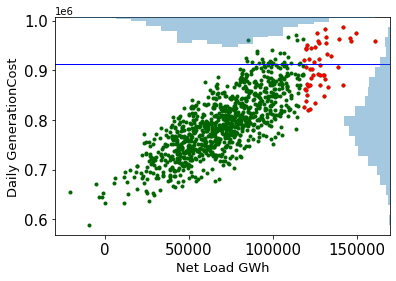

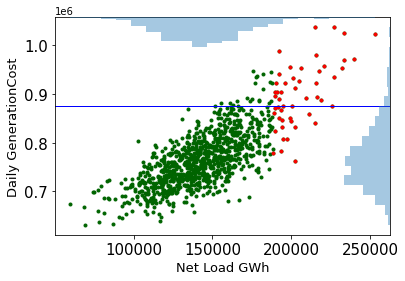

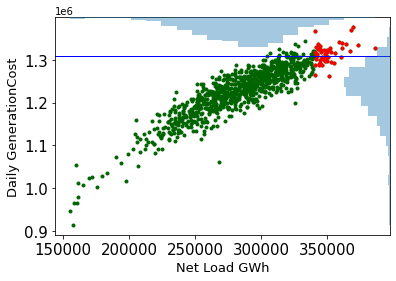

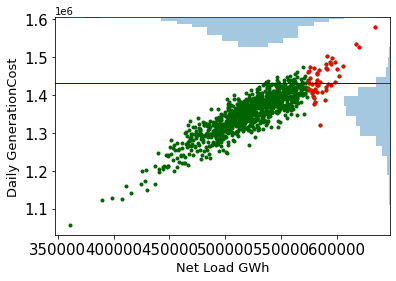

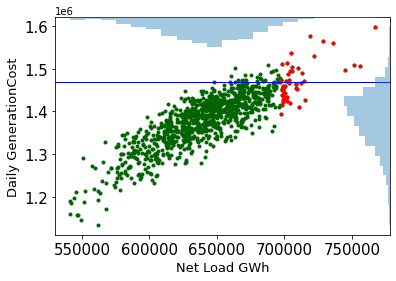

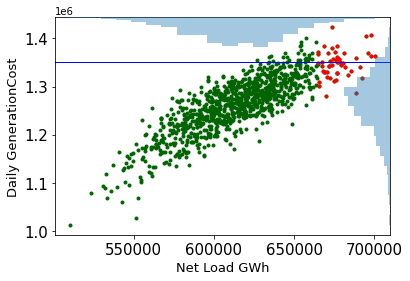

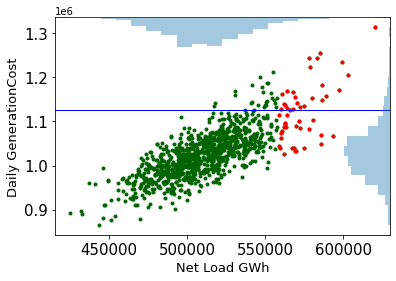

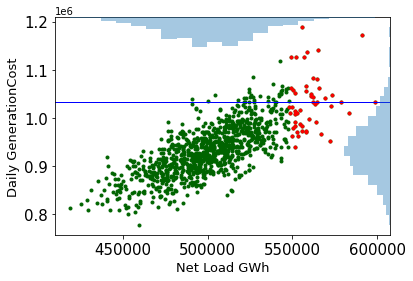

In [4]:
import pandas as pd
ProbabilityArray=[]
for date in ["Jan20","Feb16","May27","Jun04","Jul09","Sep04","Nov20","Dec19"]:
    MeanScenario = pd.read_csv(file_dir+date+"\\Mean.csv")
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    time= MeanScenario['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    WindMean=WindScenarios.mean()
    SolarMean=SolarScenarios.mean()
    LoadMean=LoadScenarios.mean()
    GenerationCostAll=np.array(GenerationCostAll,int)
    DifferenceLoadWindSolar=LoadScenarios-WindScenarios-SolarScenarios
    Thresold=DifferenceLoadWindSolar.mean()
    HighGenCost, IntegrationScen, ax, probability=GenCostIntegrationScen(DifferenceLoadWindSolar, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time,showHist=True)
    ax.set_xlabel("Net Load GWh",fontsize=13)
    #return probability

#    probability=PlotingRelationship1(time, WindScenarios,WindMean,SolarScenarios,SolarMean, LoadScenarios,LoadMean, date, True)
    ProbabilityArray.append(probability)
print('Probability Array',ProbabilityArray)
#df = pd.DataFrame(ProbabilityArray)
#df.to_csv(file_dir+'ProbabilityNetLoad.csv')

In case of Wind scenarios and solarscenarios, net integration over 24 hrs are uncorrelated to the generation cost. So, unlike RTS data, high generation cost can not be predicted from the wind and the solar scenarios.  

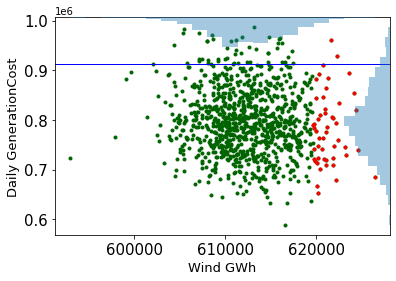

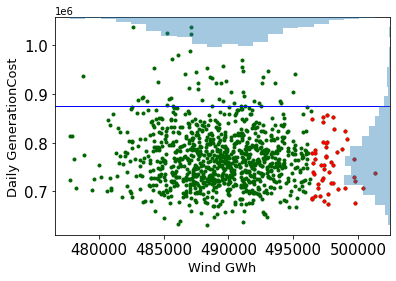

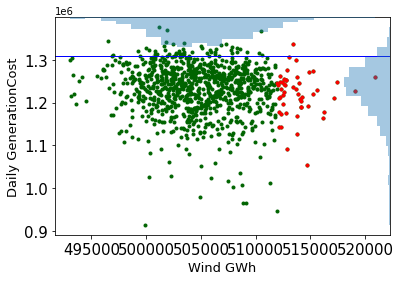

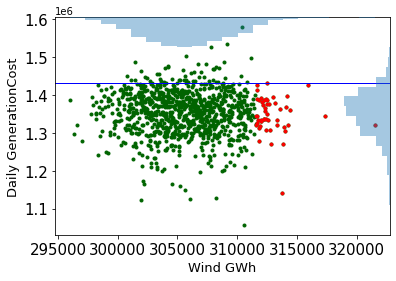

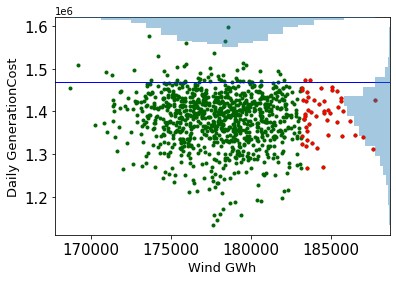

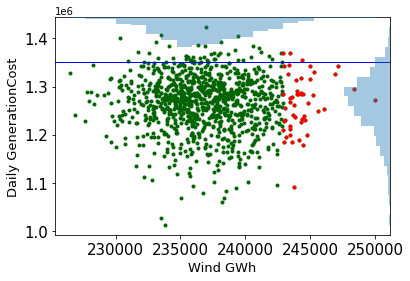

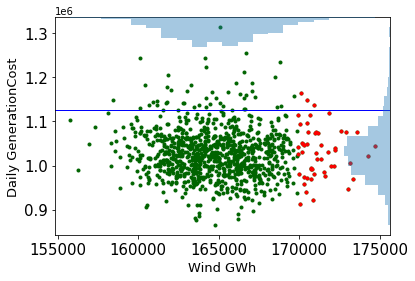

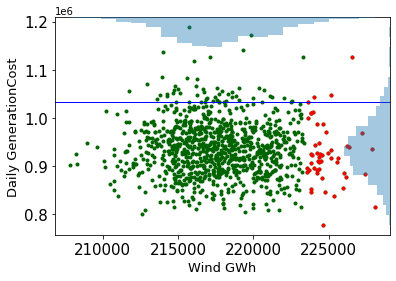

In [5]:
for date in ["Jan20","Feb16","May27","Jun04","Jul09","Sep04","Nov20","Dec19"]:
    MeanScenarios = pd.read_csv(file_dir+date+"\\Mean.csv")
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    time= MeanScenarios['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    WindMean=WindScenarios.mean()
    SolarMean=SolarScenarios.mean()
    LoadMean=LoadScenarios.mean()
    GenerationCostAll=np.array(GenerationCostAll,int)
    Thresold=WindScenarios.mean()
    HighGenCost, IntegrationScen, ax, probability=GenCostIntegrationScen(WindScenarios, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time,showHist=True)
    ax.set_xlabel("Wind GWh",fontsize=13)
    #PlotingRelationship2(time, WindScenarios,WindMean,SolarScenarios,SolarMean, LoadScenarios,LoadMean, date, True)

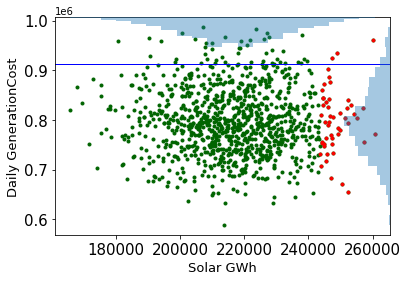

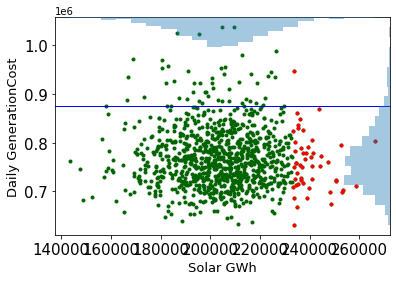

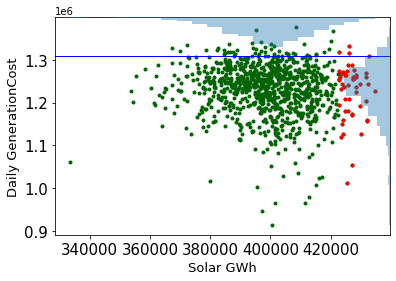

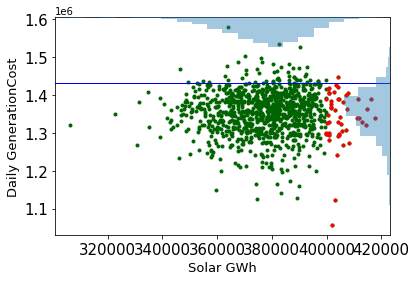

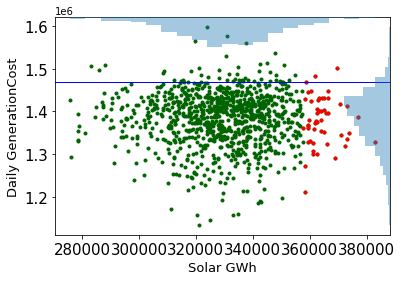

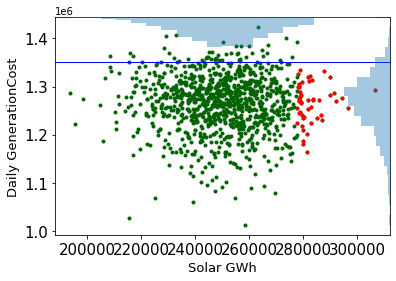

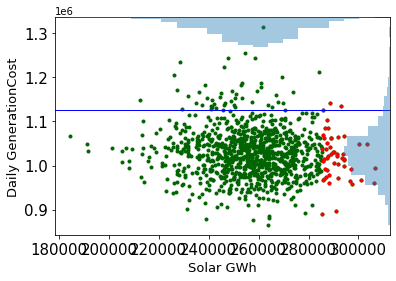

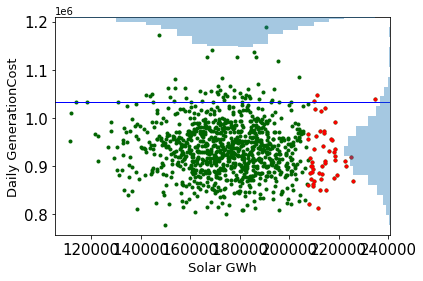

In [6]:
for date in ["Jan20","Feb16","May27","Jun04","Jul09","Sep04","Nov20","Dec19"]:
    MeanScenarios = pd.read_csv(file_dir+date+"\\Mean.csv")
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    time= MeanScenarios['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    WindMean=WindScenarios.mean()
    SolarMean=SolarScenarios.mean()
    LoadMean=LoadScenarios.mean()
    GenerationCostAll=np.array(GenerationCostAll,int)
    Thresold=SolarScenarios.mean()
    HighGenCost, IntegrationScen, ax, probability=GenCostIntegrationScen(SolarScenarios, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time,showHist=True)
    ax.set_xlabel("Solar GWh",fontsize=13)
    #PlotingRelationship3(time, WindScenarios,WindMean,SolarScenarios,SolarMean, LoadScenarios,LoadMean, date, True)


We have load shedding for three days and for the three days, scenarios causing the load shed are shown with black color on top of the scenarios.

Mean reserve short fall 13169.142044599987
correlation coefficient between generation cost and reserve short fall 0.9580922811008398
hrs when we get highest jump in the energy and expect a load shedding:  23
Mean reserve short fall 25691.350792400026
correlation coefficient between generation cost and reserve short fall 0.9396659471458216
hrs when we get highest jump in the energy and expect a load shedding:  4
hrs when we get highest jump in the energy and expect a load shedding:  23
Mean reserve short fall 11865.986901099983
correlation coefficient between generation cost and reserve short fall 0.9366465502640899
hrs when we get highest jump in the energy and expect a load shedding:  10
hrs when we get highest jump in the energy and expect a load shedding:  10
hrs when we get highest jump in the energy and expect a load shedding:  10
hrs when we get highest jump in the energy and expect a load shedding:  10
hrs when we get highest jump in the energy and expect a load shedding:  10
hr

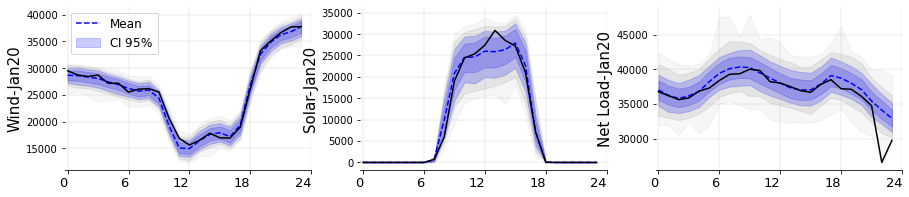

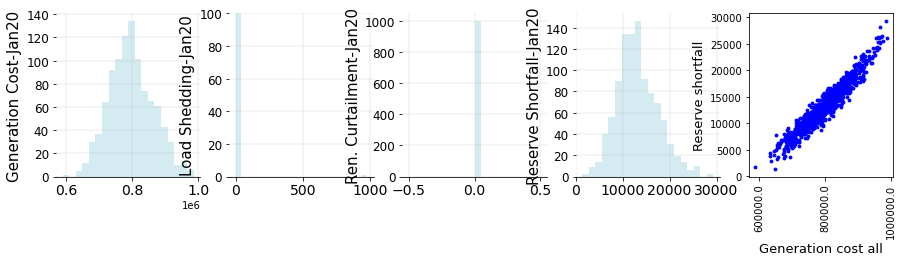

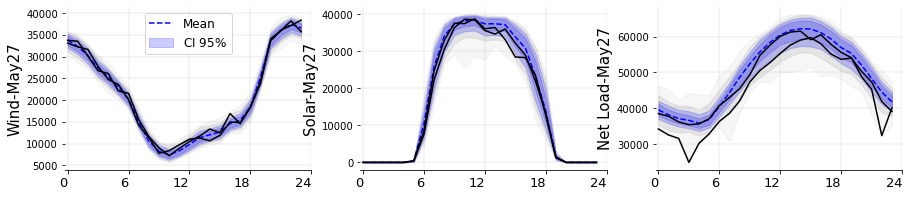

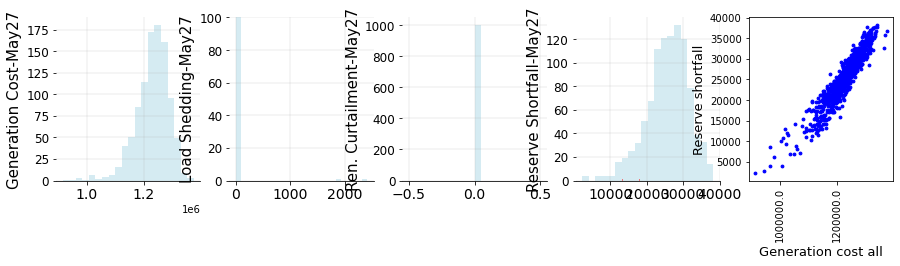

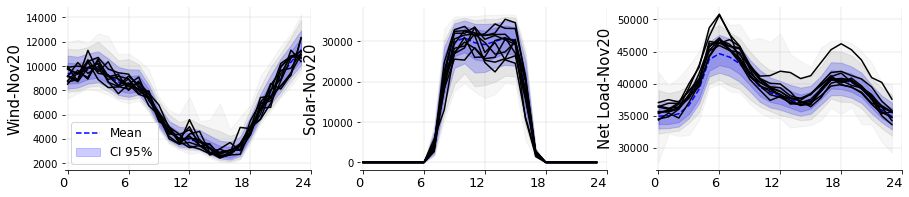

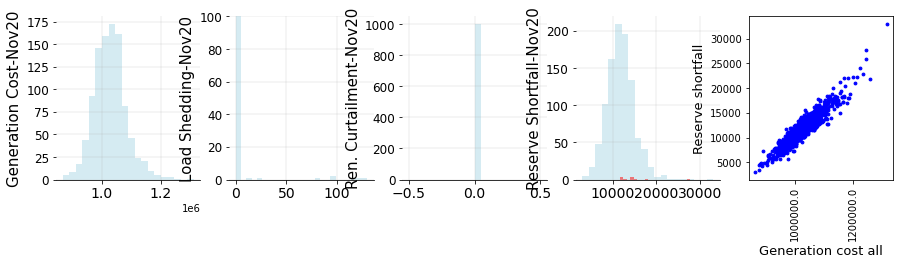

In [7]:
import array
from PlotVaticScenarios import *
for date in ["Jan20", "Feb16","May27","Jun04","Jul09","Sep04","Nov20","Dec19"]:
    MeanScenario = pd.read_csv(file_dir+date+"\\Mean.csv")
    time= MeanScenario['time']
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    ReserveShortfallAll=VaticOutput['ReserveShortfallAll']
    
    LoadShedIndex=np.where(LoadSheddingAll != 0)[0]
    
    if len(LoadShedIndex)>0:
        PlotingScenariosLoadShed(time, WindScenarios, SolarScenarios, LoadScenarios, LoadShedIndex, date)
        ShedNetLoad= np.array(LoadScenarios)[LoadShedIndex]
        #print(ShedNetLoad)  
        Index=np.array(LoadShedIndex)
        #print(np.array(Index)[0])
    #for i in len(ShedNetLoad):
    #a=[]
    #a[1]=ShedNetLoad[0][0]- ShedNetLoad[0][1]
        print('Mean reserve short fall', ReserveShortfallAll.mean())
        ExtremeShortFall=[]
        ExtremeCost=[]
        for i in range(len(Index)):
            a=np.array(Index)[i]
            ExtremeShortFall.append(np.array(ReserveShortfallAll)[a])
            #ExtremeCost.append(np.array(GenerationCostAll[a])
            #print(np.array(ReserveShortfallAll)[a])
        ShortFall=sorted(ExtremeShortFall)
        #ExtremeCost=sorted(ExtremeCost)
        #print(ShortFall)
        PlotingVaticOutputExtreme(GenerationCostAll, LoadSheddingAll, RenewableCurtailmentAll, ReserveShortfallAll, ShortFall, date)
        for i in range(len(LoadShedIndex)):
            difference=[]
            for j in range(0,23):
                check=np.array(LoadScenarios.loc[LoadShedIndex])[i][j]-np.array(LoadScenarios.loc[LoadShedIndex])[i][j+1]
                if check>0:
                    difference.append(abs(check))
                else:
                    difference.append(0)
            #print(difference)
            max_value = max(difference)
            max_index = difference.index(max_value)
            #print(max_value)
            print('hrs when we get highest jump in the energy and expect a load shedding: ',max_index+2)

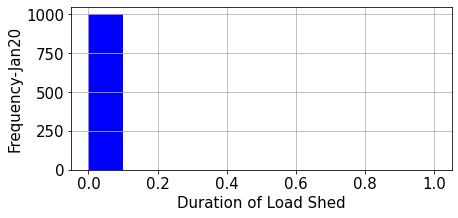

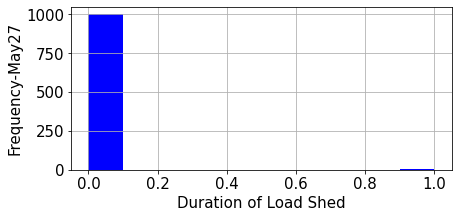

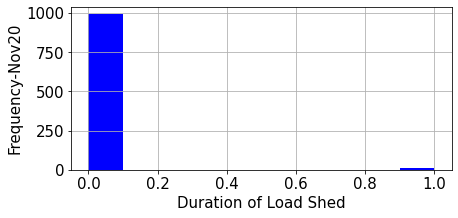

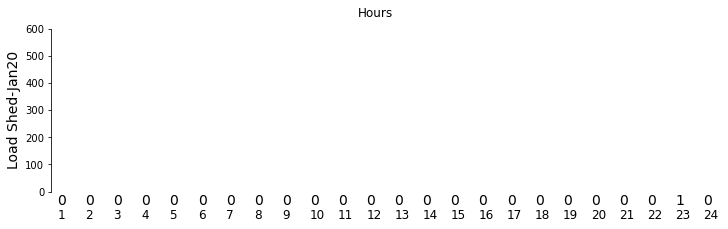

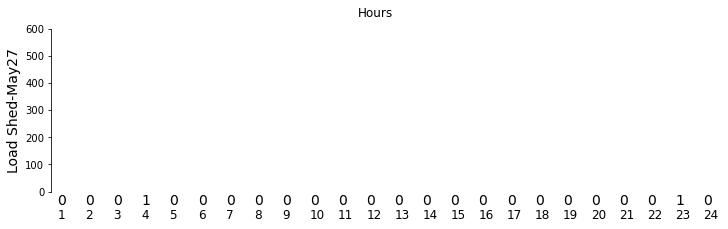

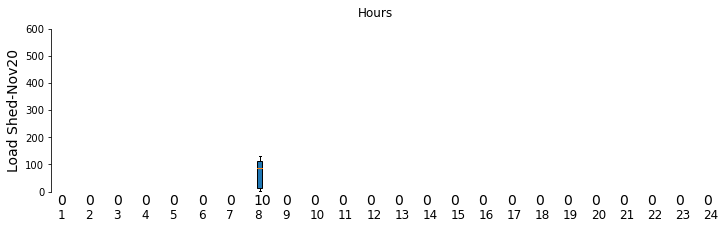

In [8]:
for date in ["Jan20", "May27", "Nov20"]:#,"Feb16","May27","Jun04","Jul09","Sep04","Nov20","Dec19"]:
    LoadShedHour = pd.read_csv(file_dir+date+"\\LoadShedHour.csv")
    hours=LoadShedHour['hours']
    LoadShed=LoadShedHour['LoadShed']
    LoadShedHours(hours, LoadShed,date)
for date in ["Jan20", "May27", "Nov20"]:#,"Feb16","May27","Jun04","Jul09","Sep04","Nov20","Dec19"]:
    LoadShedHour = pd.read_csv(file_dir+date+"\\LoadShedHour.csv")
    hours=LoadShedHour['hours']
    LoadShed=LoadShedHour['LoadShed']
    fig, axes = plt.subplots(nrows=1,ncols=24,figsize=(12,3))
    for i in range(0,24):
         ndx = (hours == i)
         curShed = LoadShed[ ndx]
         curShed = curShed[ curShed > 0]
         axes[i].boxplot(curShed,widths=np.sqrt(len(curShed))*0.06,patch_artist=True)
         axes[i].set_ylim(0,600)
         axes[i].axis('off')
         axes[i].text(0.75,-50,len(curShed), fontsize=14)
         axes[i].text(0.75,-100,i+1, fontsize=12)
    axes[0].set_axis_on()
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['bottom'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    axes[0].set_xticks([])
    plt.suptitle('Hours')
    axes[0].set_ylabel('Load Shed-'+date,fontsize=14)